# Домашнее задание 2
## Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии. Не забывайте комментировать код, чтобы было понятно, что вы делаете.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

⚠️ Данное домашнее задание является облегченной версией домашнего задания, которое дается на курсе [Машинное обучение](https://github.com/Murcha1990/ML_AI24) на программе "Искусственный интеллект". Права на изменение и применение получены. Исходник домашнего задания (base и pro) сочетает самые разные прикладные стороны обучения моделей и рекомендуется каждому к изучению. 

Всего можно набрать 24,5 балла. В пересчете на 10 балльную систему - это 10 баллов.

**Дедлайн:** до 09:00 (утра) 08.12.2025

**Формат сдачи:** файл ipynb, название файла должно быть в виде: Фамилия_БСЦ_Группа_HW2.ipynb. За неправильно названный файл полагается штраф. Сдача ДЗ ассистенту в личку Telegram: @snovasash 

In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import random
# import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для воспроизводства результатов. Разные сиды "рандомизируют" результат (частично), поэтому для проверки ДЗ (да и в целом тоже) их важно сохранять`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [ ]:
# your code here

#10 случайных строк тренировочного датасета
print("10 случайных строк из train")
print(df_train.sample(10, random_state=42))
print("\n" + "="*80 + "\n") #Буду таким разделителем пользоваться в этом задании, потому что вывод огромный и он меня раздражает

#Первые 5 и последние 5 объектов
print("топ-5")
print(df_test.head())
print("\n")
print("боттом-5")
print(df_test.tail())
print("\n" + "="*80 + "\n")

#Пропуски в датасете
print("пропуски в тренировочном наборе")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0])
print("\n")
print("пропуски в тестовом наборе")
missing_test = df_test.isnull().sum()
print(missing_test[missing_test > 0])

#Выводим названия колонок с пропусками
cols_with_missing_train = missing_train[missing_train > 0].index.tolist()
cols_with_missing_test = missing_test[missing_test > 0].index.tolist()

print(f"Названия колонок с пропусками в train {cols_with_missing_train}")
print(f"Названия колонок с пропусками в test {cols_with_missing_test}")
print("\n")

#Проверяем наличие явных дубликатов (ВЫ ЭТО НЕ СДЕЛАЛИ)
duplicates_train = df_train.duplicated().sum()
duplicates_test = df_test.duplicated().sum()

print(f"Количество полных дубликатов в train {duplicates_train}")
print(f"Количество полных дубликатов в test {duplicates_test}")

#Вывод слишком крупный получился, надо включить его как скроллабл блок

10 случайных строк из train
                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol      


### **Задание 2 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
# your code here

#Сделал функцию, чтобы не повторяться. Тут убираю единицы измерения и преобразую в флоат
def clean_numeric_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.extract('([0-9.]+)', expand=False)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

#Изменяю mileage, engine, max_power для train
for col in ['mileage', 'engine', 'max_power']:
    df_train = clean_numeric_column(df_train, col)
    df_test = clean_numeric_column(df_test, col)

#Убираю torque
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

#Проверяю
print("Типы данных после обработки (на train)")
print(df_train[['mileage', 'engine', 'max_power']].dtypes)
print("\n")
print("Пример обработанных данных (на train)")
print(df_train[['mileage', 'engine', 'max_power']].head(10))

#Второй раз запустить не получается, т.к. я уже удалил torque, вызывает ошибку

KeyError: "['torque'] not found in axis"

В предыдущем задании мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
# your code here

#Столбцы, которые имеют пропуски
numeric_cols_with_missing = df_train.select_dtypes(include=[np.number]).columns[df_train.select_dtypes(include=[np.number]).isnull().any()].tolist()
print(f"Числовые столбцы с пропусками {numeric_cols_with_missing}")

#Получаем медианы на тренировочном наборе
medians = df_train[numeric_cols_with_missing].median()
print(f"Медианы для заполнения (на train):")
print(medians)

#Заполняем пропуски в train и test с медианами из train
for col in numeric_cols_with_missing:
    df_train[col].fillna(medians[col], inplace=True)
    df_test[col].fillna(medians[col], inplace=True)

#Проверяем
print(f"Пропуски в train: {df_train.isnull().sum().sum()}")
print(f"Пропуски в test: {df_test.isnull().sum().sum()}")

#Тоже одноразовый код, после первого удаления повторно не запускается. Наверное, стоило делать на копии набора это всё

Числовые столбцы с пропусками []

Медианы для заполнения (на train):
Series([], dtype: float64)

Пропуски в train: 0
Пропуски в test: 0


### **Задание 3 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
# your code here

df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 4 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [20]:
# your code here

#Только признаки
features = df_train.drop('selling_price', axis=1)

#Дубликаты по признакам
duplicates_mask = features.duplicated(keep=False) 
num_duplicates = duplicates_mask.sum()

print(f"Кол-во объектов с одинаковым признаковым описанием {num_duplicates}")

#Отображаю объекты
if num_duplicates > 0:
    print("Примеры объектов с одинаковыми признаками (первые 20 строк)")
    duplicate_rows = df_train[duplicates_mask].sort_values(by=features.columns.tolist())
    print(duplicate_rows.head(20))

#Удаляем повторяющиеся строки, оставляем только первую (кроме selling_price)
print(f"Шейп данных до удаления {df_train.shape}")
df_train = df_train.drop_duplicates(subset=features.columns, keep='first')
print(f"Размер данных после удаления {df_train.shape}")
print(f"Удалено строк {num_duplicates - df_train.shape[0]}")

#Обновляем индексы (чтобы шли от 0 без пропусков)
df_train = df_train.reset_index(drop=True)

Кол-во объектов с одинаковым признаковым описанием 1799
Примеры объектов с одинаковыми признаками (первые 20 строк)
                                      name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1779         BMW 3 Series 

In [21]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [23]:
# your code here

#Статистики по числовым столбцам
print("Числовые признаки (train)")
print(df_train.describe())
print("Числовые признаки (test)")
print(df_test.describe())

#Статистики по категориальным столбцам
print("Категориальные признаки (train)")
print(df_train.describe(include='object'))
print("Категориальные признаки (test)")
print(df_test.describe(include='object'))

Числовые признаки (train)
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

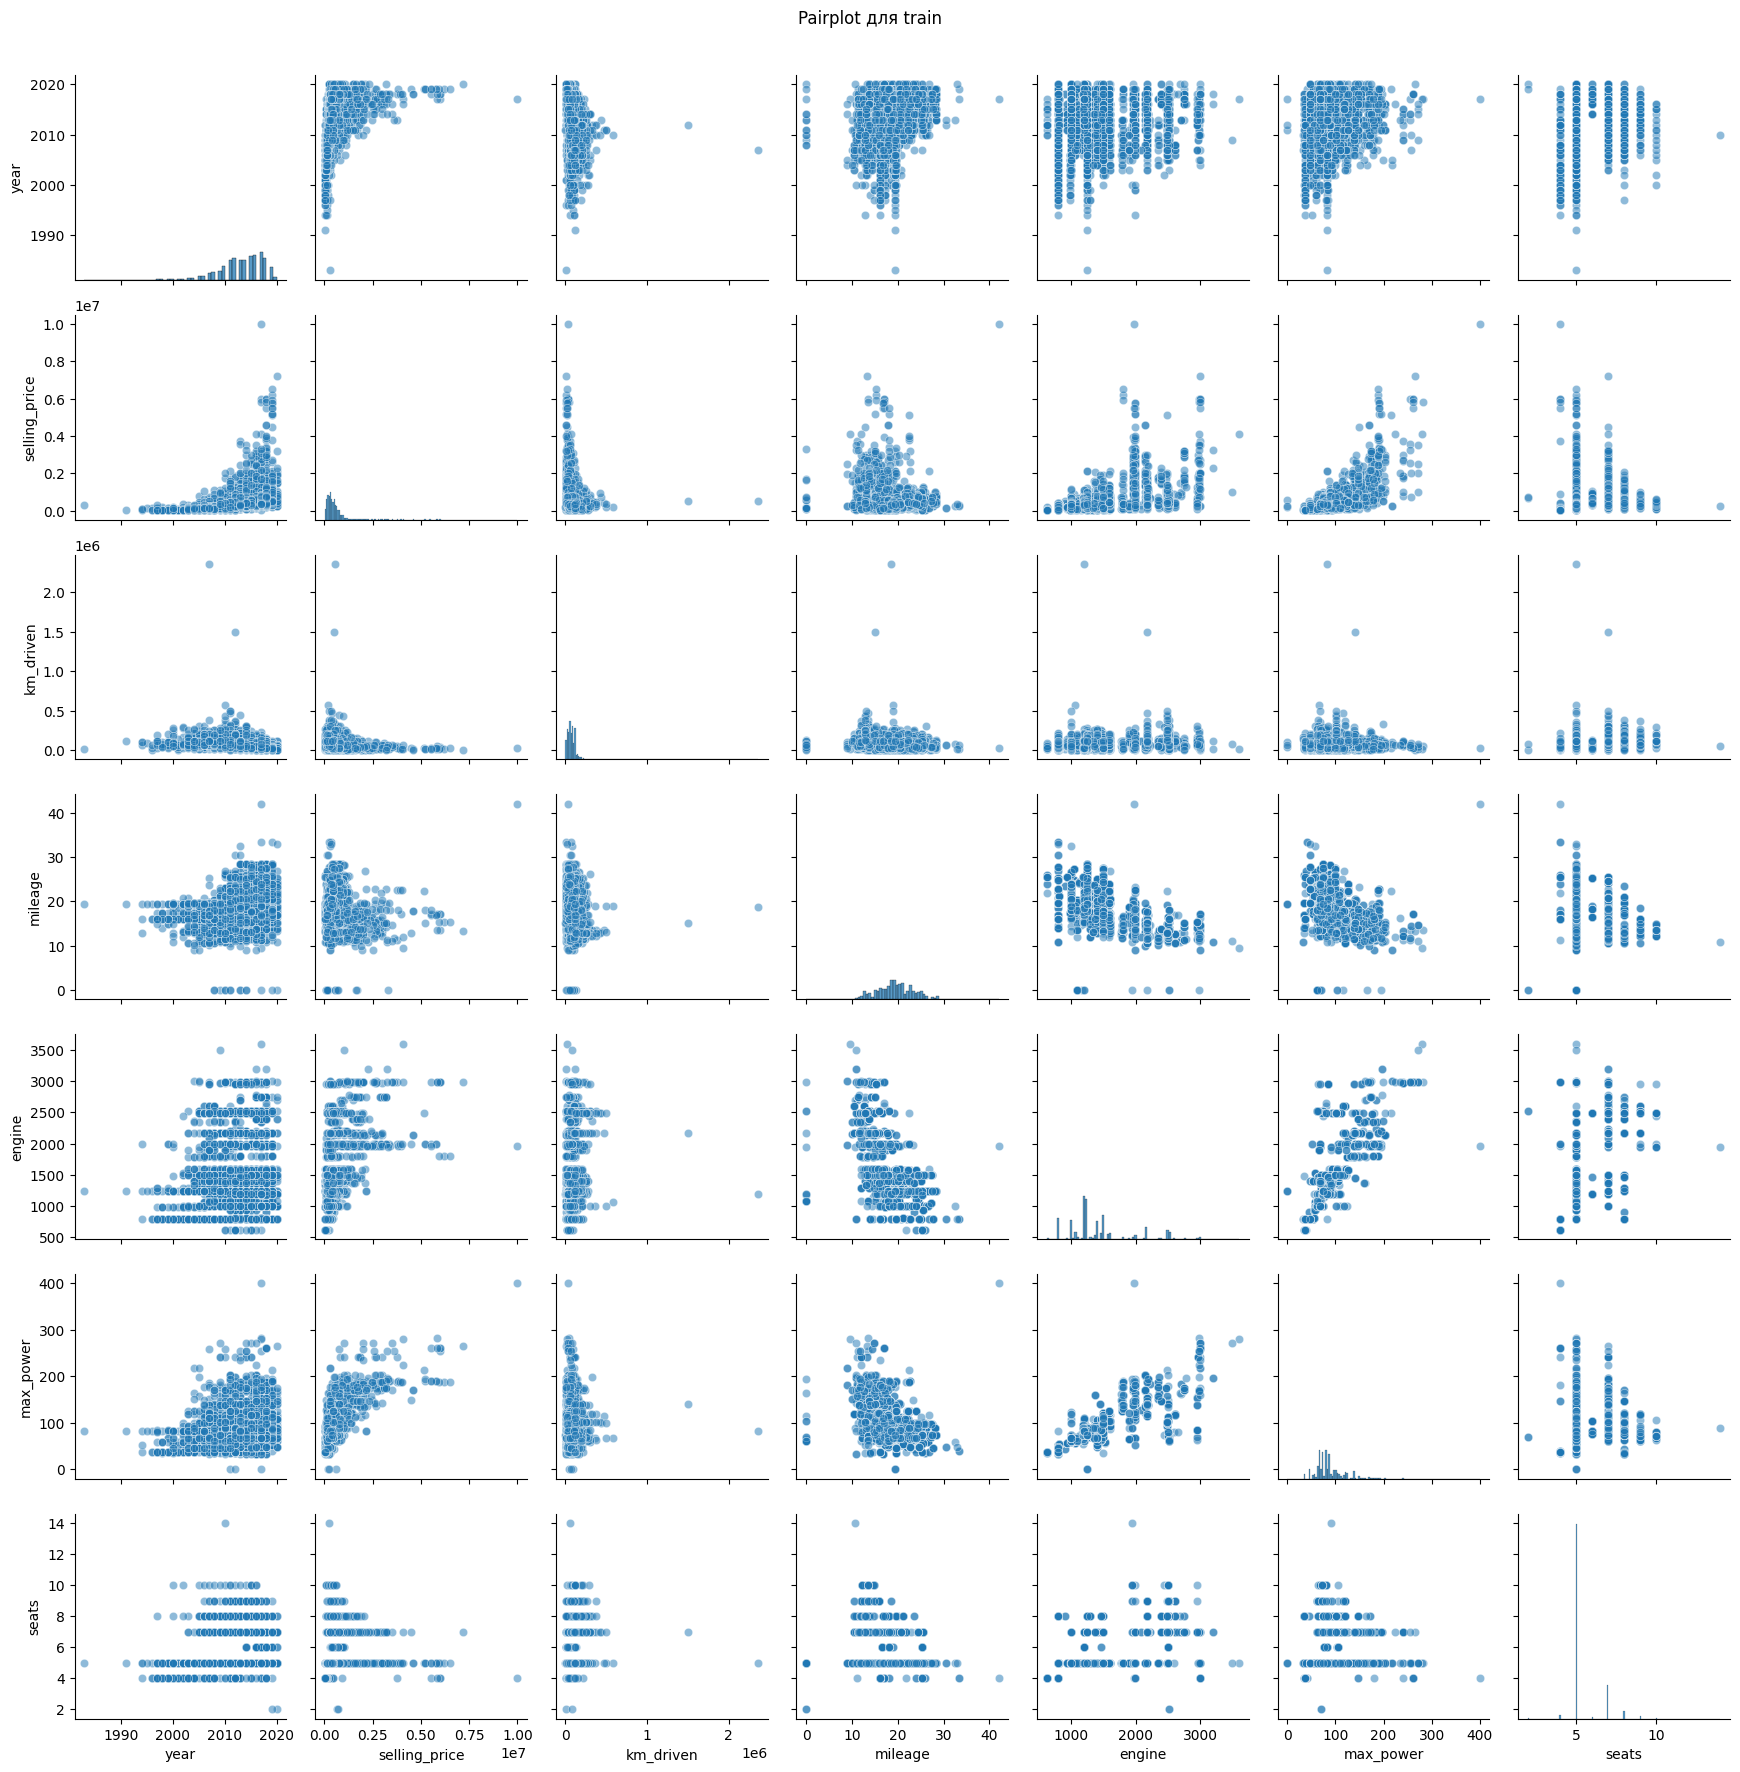

In [ ]:
# your code here

#сначала установим seaborn и matplotlib, если они не установлены. Закоменчу это для вас, чтобы не мешалось
#import matplotlib.pyplot as plt
#import seaborn as sns

#train
numeric_features_train = df_train.select_dtypes(include=[np.number])

sns.pairplot(numeric_features_train, diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot для train', y=1.01)
plt.tight_layout()
plt.show()

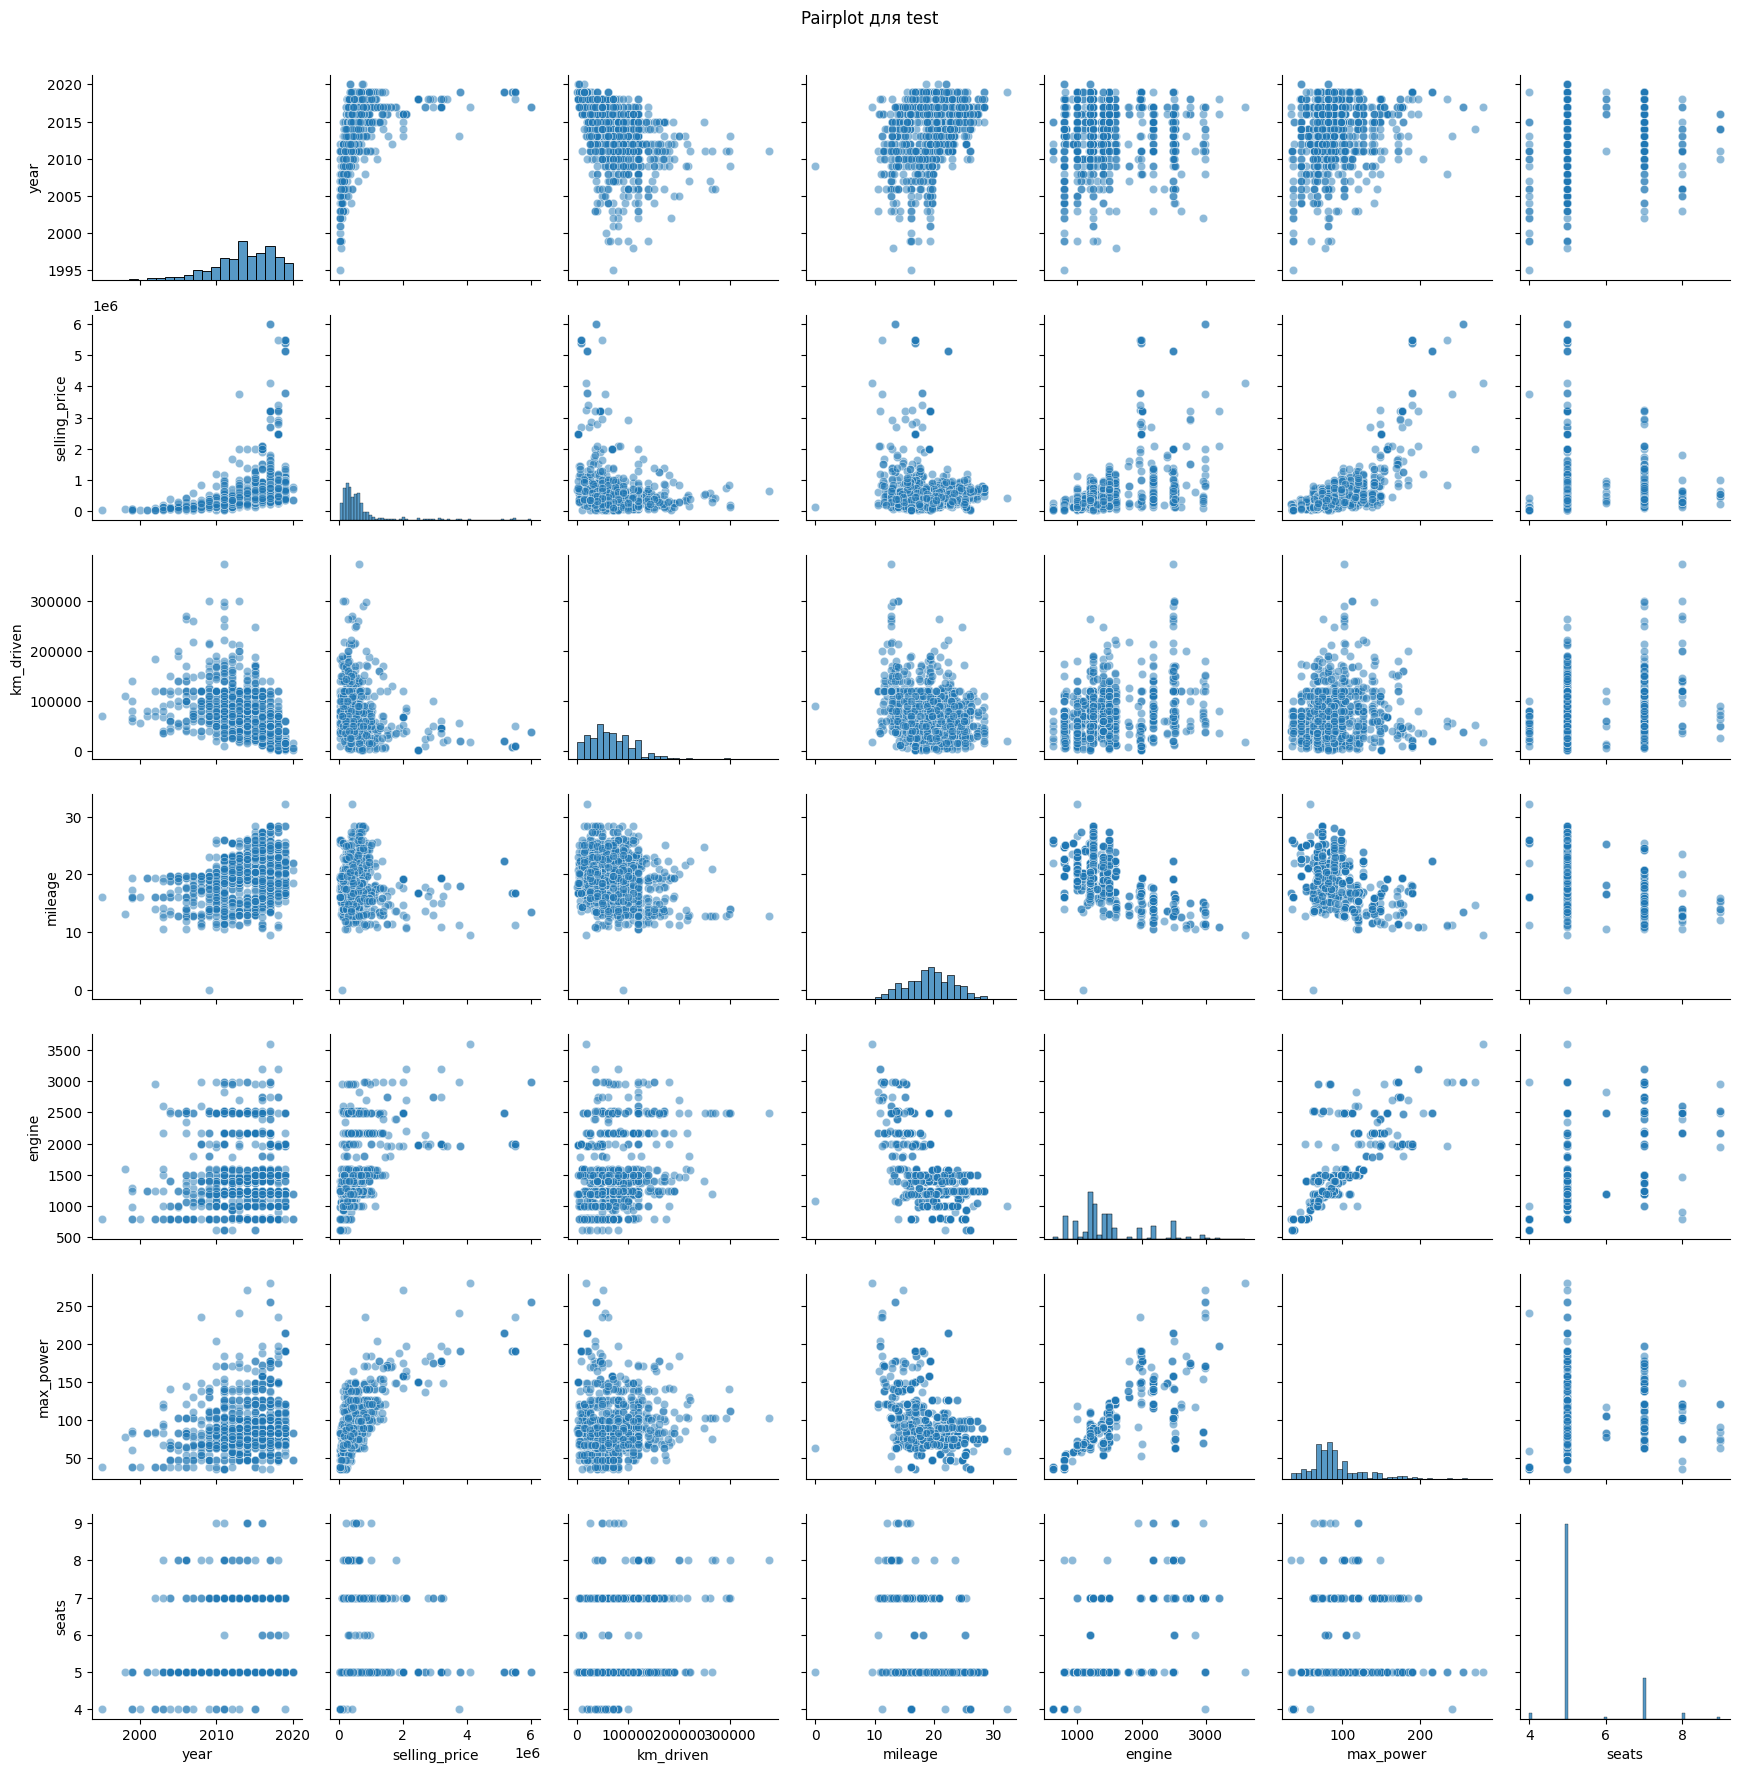

In [26]:
# your code here
#test
numeric_features_test = df_test.select_dtypes(include=[np.number])

sns.pairplot(numeric_features_test, diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot для test', y=1.01)
plt.tight_layout()
plt.show()

`Ответ на вопрос:`
`1. selling_price визуально явно связана с признаками year, max_power, engine и km_driven. С остальными признаками нет такой уверенности.`
`2. Признаки mileage и engine, max_power и engine, mileage и max_power, также визуально коррелируют между собой. У year также присутствует подозрение на корреляцию с engine и max_power, но здесь я не уверен.`
`3. Графики для test и train оказались достаточно похожими. Формы гистограмм практически идентичны, хоть и не идеально совпадают. Кажется, это хороший показатель.`

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


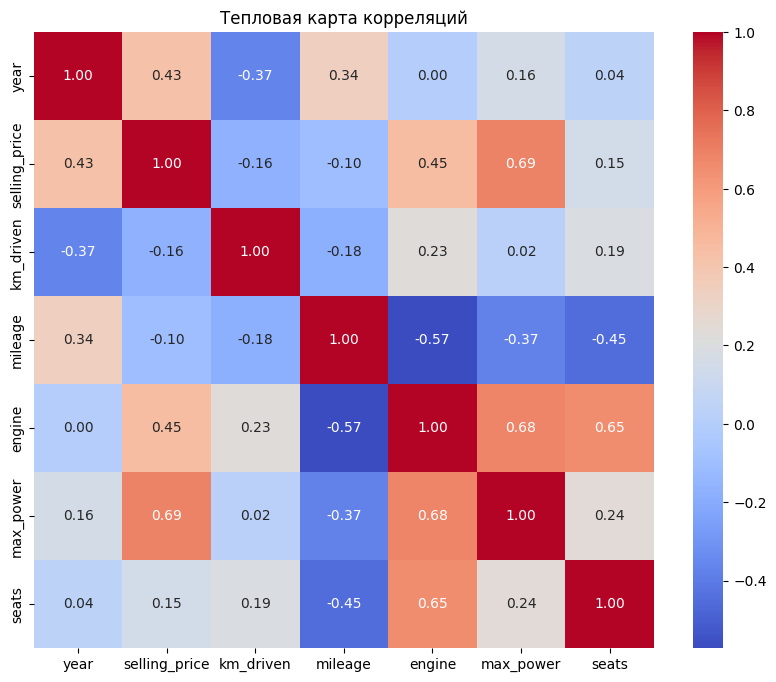

In [33]:
correlation_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляций')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Ответы`
`Признаки engine и year наименее скоррелированны (значение корреляции - 0)`
`Самая сильная положительная связь - между max_power и selling_price (0.69)`
`Да, это заметно по отрицательной корреляции между year и km_driven - коэффициент равен -0.37. Чем меньше её год, тем выше её пробег.`

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [49]:
df_train.columns
df_train.info()
#Я хочу узнать типы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [59]:
#Я посмотрел, и кажется, что изначальный код с ошибкой. Не стоит dropna делать по отдельности, т.к. это приведет к тому, что данные в X и Y перестанут правильно совпадать.
#Поэтому перепишу. Надеюсь ничего не сломаю)

#Все колонки, которые нам нужны (и признаки, и цель)
cols_to_use = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
df_train_cleaned = df_train[cols_to_use].dropna()

#Теперь делим данные на X и Y (изначально, кстати, в X было всего 3 признака почему-то, добавил все 6 нужных)
X_train = df_train_cleaned.drop(columns=['selling_price'])
y_train = df_train_cleaned['selling_price']

In [60]:
X_train.shape

(5840, 6)

In [61]:
%%time

for i in range(1, 100000):
    i

CPU times: total: 0 ns
Wall time: 4.88 ms


In [62]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [64]:
cols_to_use2 = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
df_test_cleaned = df_test[cols_to_use2].dropna()

y_test = df_test_cleaned["selling_price"]
X_test = df_test_cleaned[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [65]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as MSE

#Создаем и обучаем модель линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

#Делаем предсказания для обучающей и тестовой выборок
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#Рассчитываем метрики R^2 и MSE для обеих выборок
r2_train = r2(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train)

r2_test = r2(y_test, y_pred_test)
mse_test = MSE(y_test, y_pred_test)

#Выводим результаты
print("Метрики для обучающей выборки (Train)")
print(f"R^2 {r2_train}")
print(f"MSE {mse_train}")
print("Метрики для тестовой выборки (Test)")
print(f"R^2 {r2_test}")
print(f"MSE {mse_test}")

Метрики для обучающей выборки (Train)
R^2 0.5922629595849869
MSE 116873067751.52179
Метрики для тестовой выборки (Test)
R^2 0.5941441219017086
MSE 233297548204.61337


`Выводы по результатам:`

`Модель стабильная, не переобученная.`
`R^2 на train (0.5923) и R^2 на test (0.5941) почти одинаковые. То есть модель одинаково хорошо работает на тренировочных и на тестовых данных.`

`Предсказательная сила модели средняя.`
`Почему: R^2 ~ равен 0.59. Т.е. модель объясняет только 59% факторов, влияющих на цену. Это лучше, чем ничего, но не идеально.`

`Модель ошибается на большие суммы.`
`MSE на test огромный. Если посчитать корень из него (RMSE), то в ошибка в предсказании цены будет примерно 483.000. Для train это будет где-то 341.000`

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [67]:
from sklearn.preprocessing import StandardScaler

# your code here

scaler = StandardScaler()
#Обучаем scaler на тренировочных данных и сразу же их преобразуем
X_train_scaled = scaler.fit_transform(X_train)
#Применяем scaler к тестовым данным
X_test_scaled = scaler.transform(X_test)

#Проверка
print("Изначальные данные")
print(X_train.iloc[0].values)
print("Стандартизированные данные")
print(X_test_scaled[0])

Изначальные данные
[2.014e+03 1.455e+05 2.340e+01 1.248e+03 7.400e+01 5.000e+00]
Стандартизированные данные
[-0.83716668  1.56574049 -1.36202722  2.20037946  0.76142848  1.60170212]


### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [72]:
# your code here
#Создаем и обучаем новую модель
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

#Коэффициенты модели. Я не понял, где брать "beta_i", поэтому использую coef_. Поискал, вроде это и есть то что нужно
coefficients = lr_scaled.coef_

#Хочу для наглядности собрать в датафрейм
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': coefficients})
feature_importance['abs_importance'] = abs(feature_importance['importance'])
#Сортируем, тоже для визуальной простоты
feature_importance = feature_importance.sort_values(by='abs_importance', ascending=False)

#Выводим результат
print(feature_importance)

     feature     importance  abs_importance
4  max_power  322779.703236   322779.703236
0       year  152843.262358   152843.262358
3     engine   61176.857150    61176.857150
1  km_driven  -44148.047511    44148.047511
2    mileage   28781.086595    28781.086595
5      seats  -23220.570226    23220.570226


`Ответ на вопрос:`
`Наиболее информативный признак - max_power. То есть максимальная мощность автомобиля значительнее всего предсказывает цену машины.`

### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [75]:
from sklearn.linear_model import Lasso

# your code here
#Создаем модель Lasso
lasso = Lasso()
#Обучаем модель
lasso.fit(X_train_scaled, y_train)
#Делаем предсказания для обучающей и тестовой выборок
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)
#Метрики качества
r2_train_lasso = r2(y_train, y_pred_train_lasso)
mse_train_lasso = MSE(y_train, y_pred_train_lasso)
r2_test_lasso = r2(y_test, y_pred_test_lasso)
mse_test_lasso = MSE(y_test, y_pred_test_lasso)

#Проверим
print("Метрики для Lasso (Train)")
print(f"R^2: {r2_train_lasso:}")
print(f"MSE: {mse_train_lasso}")
print("Метрики для Lasso (Test)")
print(f"R^2: {r2_test_lasso}")
print(f"MSE: {mse_test_lasso}")

Метрики для Lasso (Train)
R^2: 0.5922629595497046
MSE: 116873067761.63504
Метрики для Lasso (Test)
R^2: 0.5941429546560312
MSE: 233298219170.76022


`Модель все еще стабильна и не переобучена, т.к. R^2 на train (0.5923) и R^2 на test (0.5941) практически одинаковые.`
`Предсказательная сила осталась средней. Модель объясняет 59% факторов, влияющих на цену. Этот показатель не улучшился (ну или я ошибся).`
`Lasso с настройками по умолчанию не улучшила модель. Метрики практически не изменились по сравнению с обычной линейной регрессией. Видимо, сила регуляризации по умолчанию (alpha=1.0) слишком слабая, чтобы как-то повлиять на эту модель.`

In [76]:
# your code here
lasso_coeffs = lasso.coef_
#Сделаю дф для наглядности
feature_importance_lasso = pd.DataFrame({'feature': X_train.columns, 'importance': lasso_coeffs})
print("Веса признаков в Lasso регрессии")
print(feature_importance_lasso)

#Проверяем, есть ли нулевые веса
zero_coeffs = feature_importance_lasso[feature_importance_lasso['importance'] == 0]
print(zero_coeffs)

Веса признаков в Lasso регрессии
     feature     importance
0       year  152843.083853
1  km_driven  -44146.918538
2    mileage   28779.204085
3     engine   61172.025780
4  max_power  322780.586197
5      seats  -23217.693273
Empty DataFrame
Columns: [feature, importance]
Index: []


`Empty DataFrame показывает, что ничего не занулилось. Это либо из-за того, что alpha = 1, т.е. регуляризация оказалась слишком слабой, либо из-за того, что все признаки действительно вносят вклад. На анализе корреляций ранее мы видели, что признаки очень коррелируют с целевой переменной.`

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [78]:
from sklearn.model_selection import GridSearchCV

# your code here

#Увеличим max_iter, тк при переборе GridSearch может не сойтись со стандартным значением
lasso = Lasso(max_iter=10000)

#Определяем сетку параметров для перебора
alphas = np.logspace(0, 4, 50)
param_grid = {'alpha': alphas}

#cv=10
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_lasso = grid_search.best_estimator_

#Сколько моделей пришлось обучить?
num_alphas = len(alphas)
num_folds = 10
total_models = num_alphas * num_folds

print(f"Количество значений alpha для проверки {num_alphas}")
print(f"Количество фолдов для кросс-валидации {num_folds}")
print(f"Всего пришлось обучить моделей {total_models}")

Количество значений alpha для проверки 50
Количество фолдов для кросс-валидации 10
Всего пришлось обучить моделей 500


In [ ]:
# your code here
#Какой коэффициент у лучшей модели и занулились ли веса?
best_alpha = grid_search.best_params_['alpha']
print(f"Оптимальный альфа {best_alpha:.2f}\n")

#Смотрим на веса лучшей модели
best_coeffs = pd.DataFrame(data=best_lasso.coef_,index=X_train.columns,columns=['importance'])

print("Веса признаков у лучшей модели Lasso")
print(best_coeffs)

#Есть ли зануленные веса
if (best_coeffs['importance'] == 0).any():
    print("\nНекоторые веса занулились")
else:
    print("\nНи один из весов не занулился")

Оптимальный альфа 1048.11

Веса признаков у лучшей модели Lasso
              importance
year       152619.478038
km_driven  -42987.632194
mileage     26869.146271
engine      56205.771231
max_power  323679.844546
seats      -20226.028289

Ни один из весов не занулился


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [80]:
from sklearn.linear_model import ElasticNet

#Создаем экземпляр модели
elastic_net = ElasticNet(max_iter=10000)

#Определяем сетку параметров для перебора
param_grid_en = {'alpha': np.logspace(0, 4, 20), 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]}

#Настраиваем GridSearchCV
grid_search_en = GridSearchCV(estimator=elastic_net, param_grid=param_grid_en, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

#Запускаем поиск по сетке
grid_search_en.fit(X_train_scaled, y_train)

#Сколько моделей пришлось обучить?
num_alphas = len(param_grid_en['alpha'])
num_l1_ratios = len(param_grid_en['l1_ratio'])
num_folds = 10
total_models_en = num_alphas * num_l1_ratios * num_folds

print(f"Количество alpha для проверки {num_alphas}")
print(f"Количество l1_ratio для проверки {num_l1_ratios}")
print(f"Количество фолдов для кросс-валидации {num_folds}")
print(f"Всего пришлось обучить моделей: {total_models_en}")


#Какие гиперпараметры у лучшей модели?
best_params_en = grid_search_en.best_params_

print(f"Оптимальный alpha {best_params_en['alpha']}")
print(f"Оптимальный l1_ratio {best_params_en['l1_ratio']}")

Количество alpha для проверки 20
Количество l1_ratio для проверки 6
Количество фолдов для кросс-валидации 10
Всего пришлось обучить моделей: 1200
Оптимальный alpha 1.6237767391887217
Оптимальный l1_ratio 0.99


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [81]:
# your code here
df_train_no_name = df_train.drop(columns=['name'])
df_test_no_name = df_test.drop(columns=['name'])

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
cols_to_encode = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
train_len = len(df_train_no_name)
full_df = pd.concat([df_train_no_name, df_test_no_name], axis=0)
full_df_encoded = pd.get_dummies(full_df, columns=cols_to_encode, drop_first=True) #Тут сразу избавляемся от одного из столбцов
df_train_final = full_df_encoded[:train_len]
df_test_final = full_df_encoded[train_len:]

#Проверим
print("Размерность train до кодирования:", df_train_no_name.shape)
print("Размерность train после кодирования:", df_train_final.shape)
print("Размерность test до кодирования:", df_test_no_name.shape)
print("Размерность test после кодирования:", df_test_final.shape)

Размерность train до кодирования: (5840, 11)
Размерность train после кодирования: (5840, 24)
Размерность test до кодирования: (1000, 11)
Размерность test после кодирования: (1000, 24)


### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Целевая переменная
y_train_final = df_train_final['selling_price']
y_test_final = df_test_final['selling_price']

#Признаки (все столбцы, кроме целевой)
X_train_final = df_train_final.drop(columns=['selling_price'])
X_test_final = df_test_final.drop(columns=['selling_price'])

#Масштабируем признаки на всякий случай
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

#Создаем экземпляр модели
ridge = Ridge()
alphas = np.logspace(0, 4, 50)
param_grid = {'alpha': alphas}

# Настраиваем GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge,param_grid=param_grid,scoring='r2',cv=10,n_jobs=-1)

# Запускаем поиск по сетке
grid_search_ridge.fit(X_train_final_scaled, y_train_final)

# Получаем лучшую модель
best_ridge = grid_search_ridge.best_estimator_

y_pred_test_ridge = best_ridge.predict(X_test_final_scaled)

r2_final_test = r2(y_test_final, y_pred_test_ridge)

print(f"Лучший параметр альфы: {grid_search_ridge.best_params_['alpha']}")
print(f"R^2 на тестовых данных для лучшей Ridge модели: {r2_final_test}")

Лучший параметр альфы: 596.3623316594643
R^2 на тестовых данных для лучшей Ridge модели: 0.612375701128347


Да, удалось, хотя и незначительно.
Старое качество: Лучший R^2 на тестовых данных для моделей только на числовых признаках был примерно = 0.594.
Новое качество: У лучшей модели с Ridge R^2 = 0.612.

# **Часть 4 (7 баллов) | Классификация**



In [84]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [85]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [86]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             roc_curve, precision_recall_curve)

#Создаем и обучаем модель
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

ROC-AUC на тестовых данных 0.9259
PR-AUC на тестовых данных 0.9250


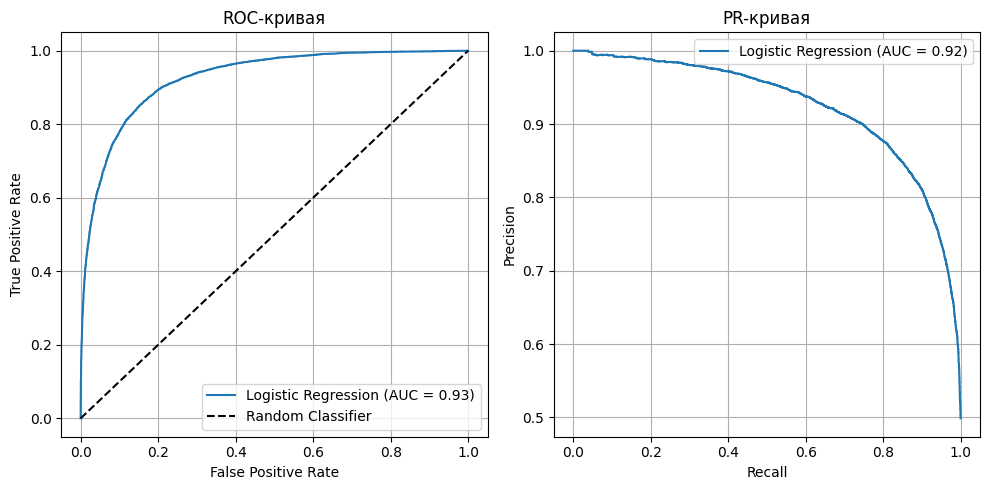

In [87]:
# your code here
#Нужны вероятности принадлежности к классу 1
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

#Посчитаем метрики
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print(f"ROC-AUC на тестовых данных {roc_auc:.4f}")
print(f"PR-AUC на тестовых данных {pr_auc:.4f}")

#Построим кривую 1.
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC-кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()

#Построим кривую 2.
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Logistic Regression (AUC = {pr_auc:.2f})')
plt.title('PR-кривая')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Судя по этим графикам, модель получилась хорошей.
ROC-AUC и PR-AUC очень высокие - примерно 0.93. Модель работает точно и отличает один класс от другого.

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка train). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет. (Датасет в чате ТГ)

In [ ]:
data = pd.read_csv('train.csv', index_col=0) #файл положил себе в папку с ipynb
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [93]:
import pandas as pd 
data = pd.read_csv('train.csv', index_col=0)


In [94]:
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [95]:
# your code here

from sklearn.metrics import classification_report, roc_auc_score

target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=124)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_proba_train = log_reg.predict_proba(X_train)[:, 1]
y_pred_test = log_reg.predict(X_test)
y_pred_proba_test = log_reg.predict_proba(X_test)[:, 1]

#Расчет и вывод метрик
print("Метрики для train")
print(f"ROC-AUC: {roc_auc_score(y_train, y_pred_proba_train):.4f}")
print(classification_report(y_train, y_pred_train))

print("Метрики для test")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_test):.4f}")
print(classification_report(y_test, y_pred_test))

c:\Users\Lenovo\OneDrive\Desktop\Python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метрики для train
ROC-AUC: 0.6233
              precision    recall  f1-score   support

           0       0.97      0.63      0.76    458796
           1       0.05      0.55      0.10     17373

    accuracy                           0.62    476169
   macro avg       0.51      0.59      0.43    476169
weighted avg       0.94      0.62      0.74    476169

Метрики для test
ROC-AUC: 0.6296
              precision    recall  f1-score   support

           0       0.97      0.63      0.76    114722
           1       0.05      0.56      0.10      4321

    accuracy                           0.62    119043
   macro avg       0.51      0.59      0.43    119043
weighted avg       0.94      0.62      0.74    119043



### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [96]:
# your code here

import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score

#Находим категориальные признаки (по суффиксу)
categorical_features = [col for col in X_train.columns if col.endswith('_cat')]
#Все остальные считаем числовыми
numerical_features = [col for col in X_train.columns if col not in categorical_features]


#Используем ColumnTransformer для применения разных трансформаций к разным столбцам
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

#Обучаем препроцессор на трейне и трансформируем трейн
X_train_processed = preprocessor.fit_transform(X_train)
#Трансформируем тест
X_test_processed = preprocessor.transform(X_test)

#Обучение модели и измерение времени
log_reg_processed = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=124)

start_time = time.time()
log_reg_processed.fit(X_train_processed, y_train)
end_time = time.time()
training_time = end_time - start_time
y_pred_test = log_reg_processed.predict(X_test_processed)
y_pred_proba_test = log_reg_processed.predict_proba(X_test_processed)[:, 1]

#Результаты
num_features = X_train_processed.shape[1]
print(f"Колво признаков после кодирования {num_features}")
print(f"Секунд на обучение {training_time:.2f}")
print(f"ROC-AUC {roc_auc_score(y_test, y_pred_proba_test):.4f}")
print(classification_report(y_test, y_pred_test))

Колво признаков после кодирования 213
Секунд на обучение 13.74
ROC-AUC 0.6381
              precision    recall  f1-score   support

           0       0.97      0.63      0.77    114722
           1       0.05      0.57      0.10      4321

    accuracy                           0.63    119043
   macro avg       0.51      0.60      0.43    119043
weighted avg       0.94      0.63      0.74    119043



Если сравнивать с тем, что было до обработки, то качество немного улучшилось:
ROC-AUC подрос с 0.6296 до 0.6381.
Recall для нужного нам класса 1 тоже немного увеличился с 0.56 до 0.57.
Precision для класса 1 так и остался на уровне 0.05. 
Т.е. модель все еще делает очень много ложных срабатываний.

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [ ]:
# your code here
#Не успеваю